In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Downloads/F-F_Research_Data_5_Factors_2x3_daily.CSV', index_col = 0)
df.index = pd.to_datetime(df.index,format='%Y%m%d').to_period('D')

In [8]:
df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07-01,-0.67,0.00,-0.32,0.01,0.15,0.012
1963-07-02,0.79,-0.27,0.27,-0.08,-0.19,0.012
1963-07-03,0.63,-0.17,-0.09,0.19,-0.33,0.012
1963-07-05,0.40,0.08,-0.28,0.07,-0.33,0.012
1963-07-08,-0.63,0.04,-0.17,-0.31,0.13,0.012


In [9]:
df.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.00000
mean,0.025437,0.008475,0.017162,0.012628,0.013848,0.01836
std,0.982194,0.518452,0.500968,0.370881,0.364469,0.01255
min,-17.440000,-11.210000,-4.220000,-3.030000,-5.930000,0.00000
25%,-0.410000,-0.260000,-0.220000,-0.160000,-0.170000,0.01000
50%,0.050000,0.030000,0.010000,0.010000,0.010000,0.01900
75%,0.490000,0.300000,0.240000,0.180000,0.190000,0.02500
max,11.350000,6.110000,4.830000,4.520000,2.530000,0.06100


In [42]:
d = np.zeros((642,10))
year = 1964
month = 7
i = 0
while year <= 2017: 
    temp = df.loc[(df.index >= np.datetime64(str(year-1)+"-"+str(month).zfill(2)+"-01")) & (df.index < np.datetime64(str(year)+"-"+str(month).zfill(2)))].corr()
    d[i,0] = temp.iloc[0,1]
    d[i,1] = temp.iloc[0,2]
    d[i,2] = temp.iloc[0,3]
    d[i,3] = temp.iloc[0,4]
    d[i,4] = temp.iloc[1,2]
    d[i,5] = temp.iloc[1,3]
    d[i,6] = temp.iloc[1,4]
    d[i,7] = temp.iloc[2,3]
    d[i,8] = temp.iloc[2,4]
    d[i,9] = temp.iloc[3,4]
    i += 1
    month += 1
    if month > 12:
        year += 1
        month = 1

In [49]:
corr_mat = pd.DataFrame(data=d, columns=["Mkt-RF_SMB", "Mkt-RF_HML", "Mkt-RF_RMW", "Mkt-RF_CMA", "SMB_HML", "SMB_RMW", "SMB_CMA", "HML_RMW", "HML_CMA", "RMW_CMA"], index=pd.date_range('1964-06', periods=642, freq='M'))

In [51]:
corr_mat.head()

,Mkt-RF_SMB,Mkt-RF_HML,Mkt-RF_RMW,Mkt-RF_CMA,SMB_HML,SMB_RMW,SMB_CMA,HML_RMW,HML_CMA,RMW_CMA
1964-06-30,-0.337681,0.322942,0.063047,-0.319903,-0.041938,-0.158214,0.137386,-0.430259,0.306835,-0.412178
1964-07-31,-0.333045,0.306523,0.048989,-0.305961,-0.043060,-0.150972,0.128373,-0.432179,0.307757,-0.403503
1964-08-31,-0.328075,0.289902,0.053305,-0.328107,-0.039307,-0.150798,0.124996,-0.430299,0.289694,-0.392709
1964-09-30,-0.327372,0.270989,0.044127,-0.330966,-0.023618,-0.152232,0.122935,-0.441021,0.304826,-0.381140
1964-10-31,-0.253652,0.288772,0.003241,-0.300969,-0.022774,-0.115994,0.074661,-0.396579,0.286940,-0.346554


In [57]:
IR = np.zeros((642,5))
year = 1964
month = 7
i = 0
while year <= 2017:
    temp = df.loc[(df.index >= np.datetime64(str(year-1)+"-"+str(month).zfill(2)+"-01")) & (df.index < np.datetime64(str(year)+"-"+str(month).zfill(2)))]
    IR[i,0] = temp["Mkt-RF"].mean()/temp["Mkt-RF"].std()
    IR[i,1] = temp["SMB"].mean()/temp["SMB"].std()
    IR[i,2] = temp["HML"].mean()/temp["HML"].std()
    IR[i,3] = temp["RMW"].mean()/temp["RMW"].std()
    IR[i,4] = temp["CMA"].mean()/temp["CMA"].std()
    i += 1
    month += 1
    if month > 12:
        year += 1
        month = 1

In [60]:
IR_mat = pd.DataFrame(data=IR, columns=["Mkt-RF", "SMB", "HML", "RMW", "CMA"], index=pd.date_range('1964-06', periods=642, freq='M'))

In [61]:
IR_mat.head()

,Mkt-RF,SMB,HML,RMW,CMA
1964-06-30,0.120561,-0.101804,0.181421,-0.015472,0.044153
1964-07-31,0.142023,-0.086802,0.205185,-0.028508,0.092049
1964-08-31,0.086686,-0.068197,0.181980,-0.037122,0.103039
1964-09-30,0.124252,-0.067509,0.199465,-0.028290,0.109250
1964-10-31,0.110627,-0.028541,0.227192,-0.076263,0.155478


In [154]:
cont = 1.
Wgt = np.zeros((642,4))
for i in range(642):
    corrs = cont+max(corr_mat.iloc[i,4]-0.3,0)+max(corr_mat.iloc[i,5]-0.3,0)+max(corr_mat.iloc[i,6]-0.3,0)
    Wgt[i,0] = IR_mat.iloc[i,1]/corrs
    corrs = cont+max(corr_mat.iloc[i,4]-0.3,0)+max(corr_mat.iloc[i,7]-0.3,0)+max(corr_mat.iloc[i,8]-0.3,0)
    Wgt[i,1] = IR_mat.iloc[i,2]/corrs
    corrs = cont+max(corr_mat.iloc[i,5]-0.3,0)+max(corr_mat.iloc[i,7]-0.3,0)+max(corr_mat.iloc[i,9]-0.3,0)
    Wgt[i,2] = IR_mat.iloc[i,3]/corrs
    corrs = cont+max(corr_mat.iloc[i,6]-0.3,0)+max(corr_mat.iloc[i,8]-0.3,0)+max(corr_mat.iloc[i,9]-0.3,0)
    Wgt[i,3] = IR_mat.iloc[i,4]/corrs

In [155]:
for i in range(642):
    temp = np.zeros(4)
    temp[np.argsort(Wgt[i])[0]] = -1
    temp[np.argsort(Wgt[i])[1]] = -0.5
    temp[np.argsort(Wgt[i])[2]] = 0.5
    temp[np.argsort(Wgt[i])[3]] = 1
    Wgt[i] = temp

In [157]:
ret = np.zeros(642)
for i in range(642):
    ret[i] = np.sum(df1.iloc[12+i][1:5] * Wgt[i])

In [173]:
cumret = pd.DataFrame(data = np.cumprod(ret/100.+1.), columns=["cumulated return"], index=pd.date_range('1964-07', periods=642, freq='M'))

In [166]:
import matplotlib.pyplot as plt

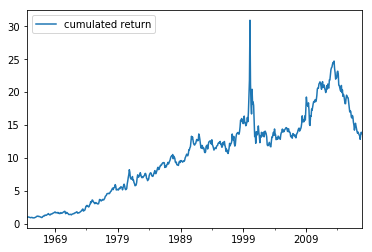

In [178]:
cumret.plot()
plt.savefig('benchmark.pdf')
plt.show()

In [92]:
df1 = pd.read_csv('Downloads/F-F_Research_Data_5_Factors_2x3.CSV', index_col = 0)
df1.index = pd.to_datetime(df1.index,format='%Y%m').to_period('M')

In [109]:
df1.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07,-0.39,-0.46,-0.81,0.72,-1.16,0.27
1963-08,5.07,-0.81,1.65,0.42,-0.40,0.25
1963-09,-1.57,-0.48,0.19,-0.80,0.23,0.27
1963-10,2.53,-1.29,-0.09,2.75,-2.26,0.29
1963-11,-0.85,-0.85,1.71,-0.34,2.22,0.27
